<a href="https://colab.research.google.com/github/bytefirst7/practical_app3/blob/main/prompt_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [28]:
# The data is based on more than one contact with the same client,
# in order to access if the product (bank term deposit) would be
# ('yes') or not ('no') subscribed.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [29]:
import time
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [31]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [32]:
# Count missing data to remove any data that is empty

missing_age = df['age'].isna().sum()
print(missing_age)

missing_job = df['job'].isna().sum()
print(missing_job)

missing_marital = df['marital'].isna().sum()
print(missing_marital)

missing_education = df['education'].isna().sum()
print(missing_education)

missing_default = df['default'].isna().sum()
print(missing_default)

missing_loan = df['loan'].isna().sum()
print(missing_loan)

missing_contact = df['contact'].isna().sum()
print(missing_contact)

missing_month = df['month'].isna().sum()
print(missing_month)

missing_day_of_week = df['day_of_week'].isna().sum()
print(missing_day_of_week)

missing_duration = df['duration'].isna().sum()
print(missing_duration)

missing_campaign = df['campaign'].isna().sum()
print(missing_campaign)

missing_pdays = df['pdays'].isna().sum()
print(missing_pdays)

missing_previous = df['previous'].isna().sum()
print(missing_previous)

missing_poutcome = df['poutcome'].isna().sum()
print(missing_poutcome)

missing_emp_var_rate = df['emp.var.rate'].isna().sum()
print(missing_emp_var_rate)

missing_cons_price_idx = df['cons.price.idx'].isna().sum()
print(missing_cons_price_idx)

missing_cons_conf_idx = df['cons.conf.idx'].isna().sum()
print(missing_cons_conf_idx)

missing_euribor3m = df['euribor3m'].isna().sum()
print(missing_euribor3m)

missing_nr_employed = df['nr.employed'].isna().sum()
print(missing_nr_employed)

missing_y = df['y'].isna().sum()
print(missing_y)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [33]:
# Business Objective:

# Evaluate and compare the performance of four classification models: K-Nearest Neighbors,
# Logistic Regression, Decision Trees, and Support Vector Machines using a bank marketing
# dataset to predict whether a client will subscribe to a term deposit.

In [34]:
# Check if I need to One-Hot encode the data

jobs = df.query("job == 'blue-collar'")
print(jobs)

       age          job  marital            education  default housing loan  \
7       41  blue-collar  married              unknown  unknown      no   no   
10      41  blue-collar  married              unknown  unknown      no   no   
12      29  blue-collar   single          high.school       no      no  yes   
14      35  blue-collar  married             basic.6y       no     yes   no   
16      35  blue-collar  married             basic.6y       no     yes   no   
...    ...          ...      ...                  ...      ...     ...  ...   
41119   36  blue-collar   single             basic.6y       no     yes   no   
41123   36  blue-collar   single             basic.6y       no      no   no   
41150   41  blue-collar  married             basic.9y       no     yes   no   
41162   60  blue-collar  married             basic.4y       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   

         contact month day_of_week  ...  campaign  

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [35]:
# Convert the datatypes of the below columns to string per the description above
df = df.astype({
    'job': 'string',
    'marital': 'string',
    'education': 'string',
    'housing': 'string',
    'loan': 'string',
    'contact': 'string',
    'month': 'string',
    'day_of_week': 'string',
    'poutcome': 'string'
})

# Drop rows if they have missing data for the below columns
df = df.dropna(subset=['age'])
df = df.dropna(subset=['job'])
df = df.dropna(subset=['marital'])
df = df.dropna(subset=['education'])
df = df.dropna(subset=['housing'])
df = df.dropna(subset=['loan'])
df = df.dropna(subset=['contact'])
df = df.dropna(subset=['month'])
df = df.dropna(subset=['day_of_week'])
df = df.dropna(subset=['poutcome'])

# One-Hot Encoding
df = pd.get_dummies(df, columns=[
    'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'
])

In [36]:
# Encode target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [37]:
# Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns.drop('y', errors='ignore')
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  boolean
 12  job_blue-collar                41188 non-null 

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [38]:
# Split features and target
X = df.drop('y', axis=1)
y = df['y']

In [39]:
# Train-test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Scaling of feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [41]:
baseline = DummyClassifier(strategy='most_frequent')
start = time.time()
baseline.fit(X_train_scaled, y_train)
train_time = time.time() - start

In [42]:
train_acc = accuracy_score(y_train, baseline.predict(X_train_scaled))
test_acc = accuracy_score(y_test, baseline.predict(X_test_scaled))

In [43]:
results = []

results = [{
    'Model': 'Baseline (Most Frequent)',
    'Train Time': round(train_time, 4),
    'Train Accuracy': round(train_acc, 4),
    'Test Accuracy': round(test_acc, 4)
}]

print(pd.DataFrame(results))

                      Model  Train Time  Train Accuracy  Test Accuracy
0  Baseline (Most Frequent)      0.0027          0.8876         0.8865


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [44]:
lr_model = LogisticRegression(max_iter=1000)
start = time.time()
lr_model.fit(X_train_scaled, y_train)
train_time = time.time() - start

train_acc = accuracy_score(y_train, lr_model.predict(X_train_scaled))
test_acc = accuracy_score(y_test, lr_model.predict(X_test_scaled))

results.append({
    'Model': 'Logistic Regression',
    'Train Time': round(train_time, 4),
    'Train Accuracy': round(train_acc, 4),
    'Test Accuracy': round(test_acc, 4)
})

### Problem 9: Score the Model

What is the accuracy of your model?

In [45]:
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Test Accuracy', ascending=False))

                      Model  Train Time  Train Accuracy  Test Accuracy
1       Logistic Regression      0.8760          0.9117         0.9115
0  Baseline (Most Frequent)      0.0027          0.8876         0.8865


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [46]:
models = {
  'KNN': KNeighborsClassifier(),
  'Decision Tree': DecisionTreeClassifier(),
  'SVM': SVC()
}

In [47]:
for name, model in models.items():
  start = time.time()
  model.fit(X_train_scaled, y_train)
  train_time = time.time() - start

  train_acc = accuracy_score(y_train, model.predict(X_train_scaled))
  test_acc = accuracy_score(y_test, model.predict(X_test_scaled))

  results.append({
    'Model': name,
    'Train Time': round(train_time, 4),
    'Train Accuracy': round(train_acc, 4),
    'Test Accuracy': round(test_acc, 4)
  })

In [48]:
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Test Accuracy', ascending=False))

                      Model  Train Time  Train Accuracy  Test Accuracy
1       Logistic Regression      0.8760          0.9117         0.9115
4                       SVM     33.9950          0.9282         0.9090
2                       KNN      0.0731          0.9199         0.8978
3             Decision Tree      0.3090          1.0000         0.8871
0  Baseline (Most Frequent)      0.0027          0.8876         0.8865


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [49]:
def evaluate_model(name, model, param_grid, X_train, y_train, X_test, y_test, scoring='accuracy', cv=5):
  """
  Performs GridSearchCV, fits the best model, and evaluates performance.

  Parameters:
    name (str): Name of the model
    model: Scikit-learn estimator
    param_grid (dict): Hyperparameter grid
    X_train, y_train: Training data
    X_test, y_test: Test data
    scoring (str): Scoring metric for GridSearchCV
    cv (int): Number of cross-validation folds

  Returns:
    dict: Model name, train time, accuracy, F1 score, ROC AUC
  """
  grid = GridSearchCV(model, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

  start = time.time()
  grid.fit(X_train, y_train)
  train_time = time.time() - start

  best_model = grid.best_estimator_
  y_pred = best_model.predict(X_test)

  # For ROC AUC, check if model supports predict_proba
  if hasattr(best_model, "predict_proba"):
    y_proba = best_model.predict_proba(X_test)[:, 1]
    roc = roc_auc_score(y_test, y_proba)
  else:
    roc = None  # Not supported

  return {
    'Model': name,
    'Train Time': round(train_time, 4),
    'Test Accuracy': round(accuracy_score(y_test, y_pred), 4),
    'F1 Score': round(f1_score(y_test, y_pred), 4),
    'ROC AUC': round(roc, 4) if roc is not None else 'N/A'
  }


In [50]:
results = []

results.append(evaluate_model(
  name='Logistic Regression',
  model=LogisticRegression(max_iter=1000),
  param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs']},
  X_train=X_train_scaled,
  y_train=y_train,
  X_test=X_test_scaled,
  y_test=y_test
))

In [51]:
results.append(evaluate_model(
  name='KNN',
  model=KNeighborsClassifier(),
  param_grid={'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
  X_train=X_train_scaled,
  y_train=y_train,
  X_test=X_test_scaled,
  y_test=y_test
))

In [52]:
results.append(evaluate_model(
  name='Decision Tree',
  model=DecisionTreeClassifier(random_state=42),
  param_grid={
      'max_depth': [5, 10, 20, None],
      'min_samples_split': [2, 10, 20],
      'criterion': ['gini', 'entropy']
  },
  X_train=X_train_scaled,
  y_train=y_train,
  X_test=X_test_scaled,
  y_test=y_test
))

In [53]:
results.append(evaluate_model(
  name='SVM',
  model=SVC(probability=True),
  param_grid={
      'C': [0.1, 1, 10],
      'kernel': ['linear', 'rbf'],
      'gamma': ['scale', 'auto']
  },
  X_train=X_train_scaled,
  y_train=y_train,
  X_test=X_test_scaled,
  y_test=y_test
))

In [54]:
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Test Accuracy', ascending=False))

                 Model  Train Time  Test Accuracy  F1 Score  ROC AUC
2        Decision Tree     23.1369         0.9150    0.5916   0.9210
0  Logistic Regression      5.8870         0.9115    0.5245   0.9349
1                  KNN     40.7475         0.8966    0.3790   0.8199


In [55]:
def evaluate_model_with_plots(name, model, param_grid, X_train, y_train, X_test, y_test, scoring='accuracy', cv=5):
  """
  Performs GridSearchCV, fits the best model, evaluates performance, and plots metrics.

  Returns:
  dict: Summary metrics
  """
  grid = GridSearchCV(model, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

  start = time.time()
  grid.fit(X_train, y_train)
  train_time = time.time() - start

  best_model = grid.best_estimator_
  y_pred = best_model.predict(X_test)

  # ROC AUC and probability scores
  if hasattr(best_model, "predict_proba"):
    y_proba = best_model.predict_proba(X_test)[:, 1]
    roc = roc_auc_score(y_test, y_proba)
  else:
    y_proba = None
    roc = None

  f1 = f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)

  # Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(5, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title(f'{name} - Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  # Precision-Recall Curve
  if y_proba is not None:
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, marker='.')
    plt.title(f'{name} - Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'AUC = {roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f'{name} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

  return {
    'Model': name,
    'Train Time': round(train_time, 4),
    'Test Accuracy': round(acc, 4),
    'F1 Score': round(f1, 4),
    'ROC AUC': round(roc, 4) if roc is not None else 'N/A'
  }


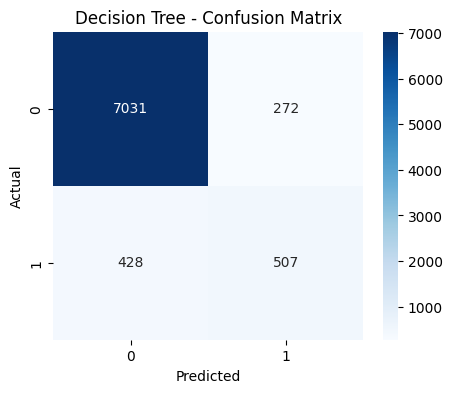

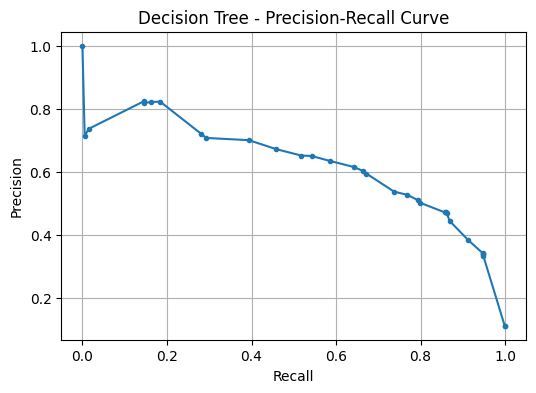

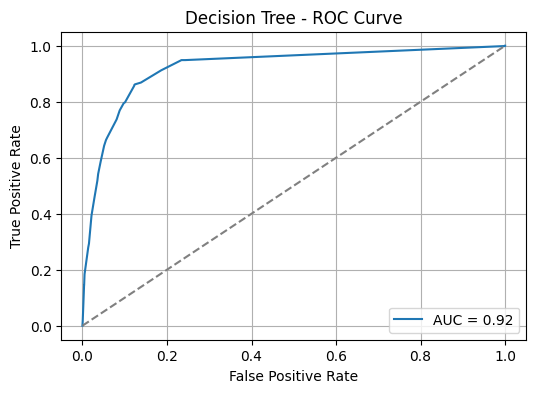

In [56]:
results = []

results.append(evaluate_model_with_plots(
  name='Decision Tree',
  model=DecisionTreeClassifier(random_state=42),
  param_grid={
      'max_depth': [5, 10, 20, None],
      'min_samples_split': [2, 10, 20],
      'criterion': ['gini', 'entropy']
  },
  X_train=X_train_scaled,
  y_train=y_train,
  X_test=X_test_scaled,
  y_test=y_test
))

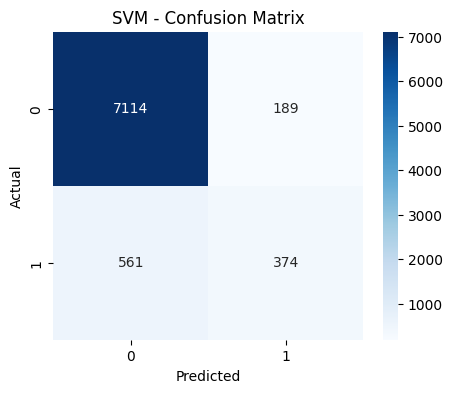

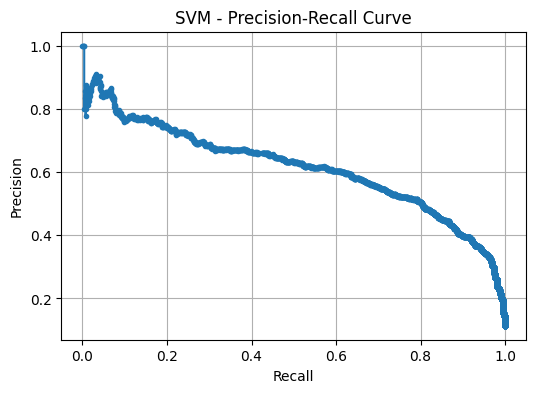

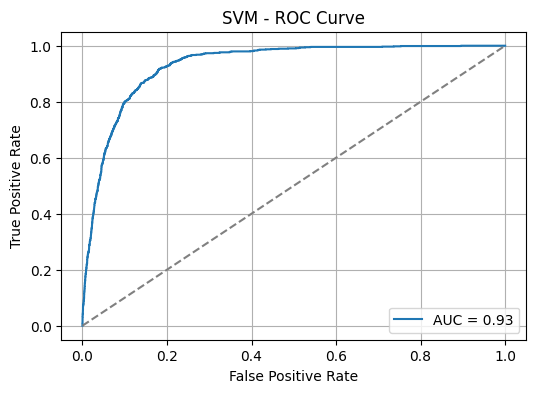

In [186]:
results.append(evaluate_model_with_plots(
  name='SVM',
  model=SVC(probability=True),
  param_grid={
      'C': [0.1, 1, 10],
      'kernel': ['linear', 'rbf'],
      'gamma': ['scale', 'auto']
  },
  X_train=X_train_scaled,
  y_train=y_train,
  X_test=X_test_scaled,
  y_test=y_test
))

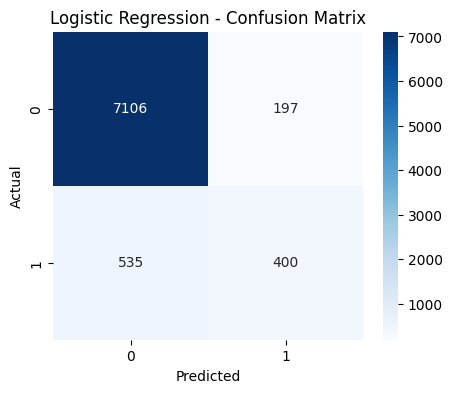

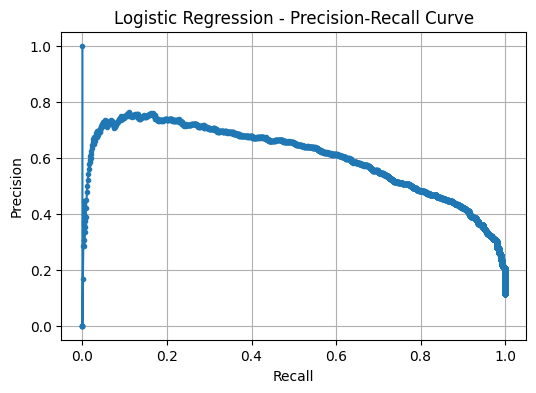

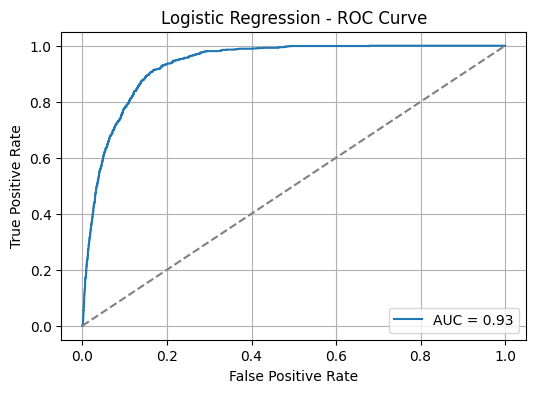

In [57]:
results.append(evaluate_model_with_plots(
  name='Logistic Regression',
  model=LogisticRegression(solver='liblinear'),
  param_grid={
      'C': [0.01, 0.1, 1, 10],
      'penalty': ['l1', 'l2']
  },
  X_train=X_train_scaled,
  y_train=y_train,
  X_test=X_test_scaled,
  y_test=y_test
))

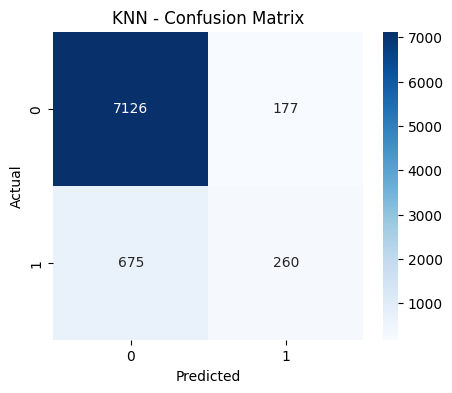

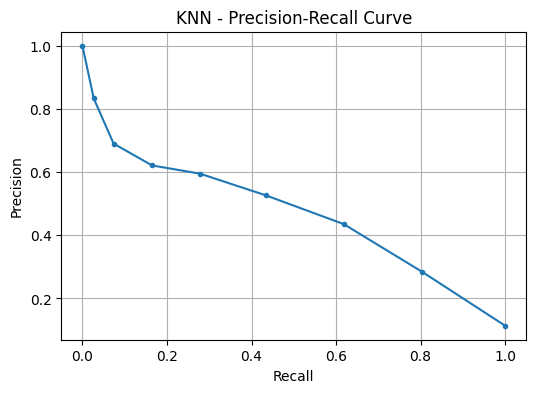

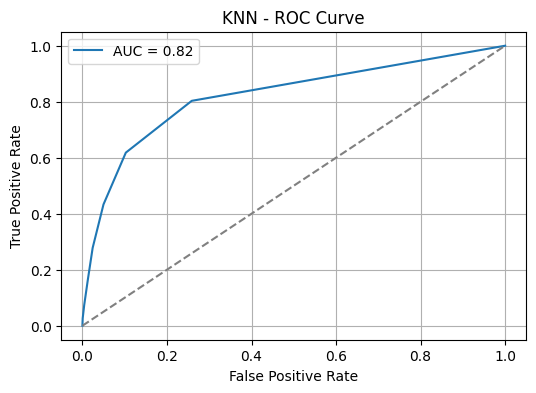

In [58]:
results.append(evaluate_model_with_plots(
  name='KNN',
  model=KNeighborsClassifier(),
  param_grid={
      'n_neighbors': [3, 5, 7],
      'weights': ['uniform', 'distance']
  },
  X_train=X_train_scaled,
  y_train=y_train,
  X_test=X_test_scaled,
  y_test=y_test
))

In [59]:
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Test Accuracy', ascending=False))

                 Model  Train Time  Test Accuracy  F1 Score  ROC AUC
0        Decision Tree     25.5203         0.9150    0.5916   0.9210
1  Logistic Regression    127.6077         0.9111    0.5222   0.9350
2                  KNN     40.9229         0.8966    0.3790   0.8199


##### Questions